In [1]:
import pandas
import pandas as pd
import matplotlib.pyplot
import matplotlib.pyplot as plt
import seaborn
import seaborn as sns

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
boston_df
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


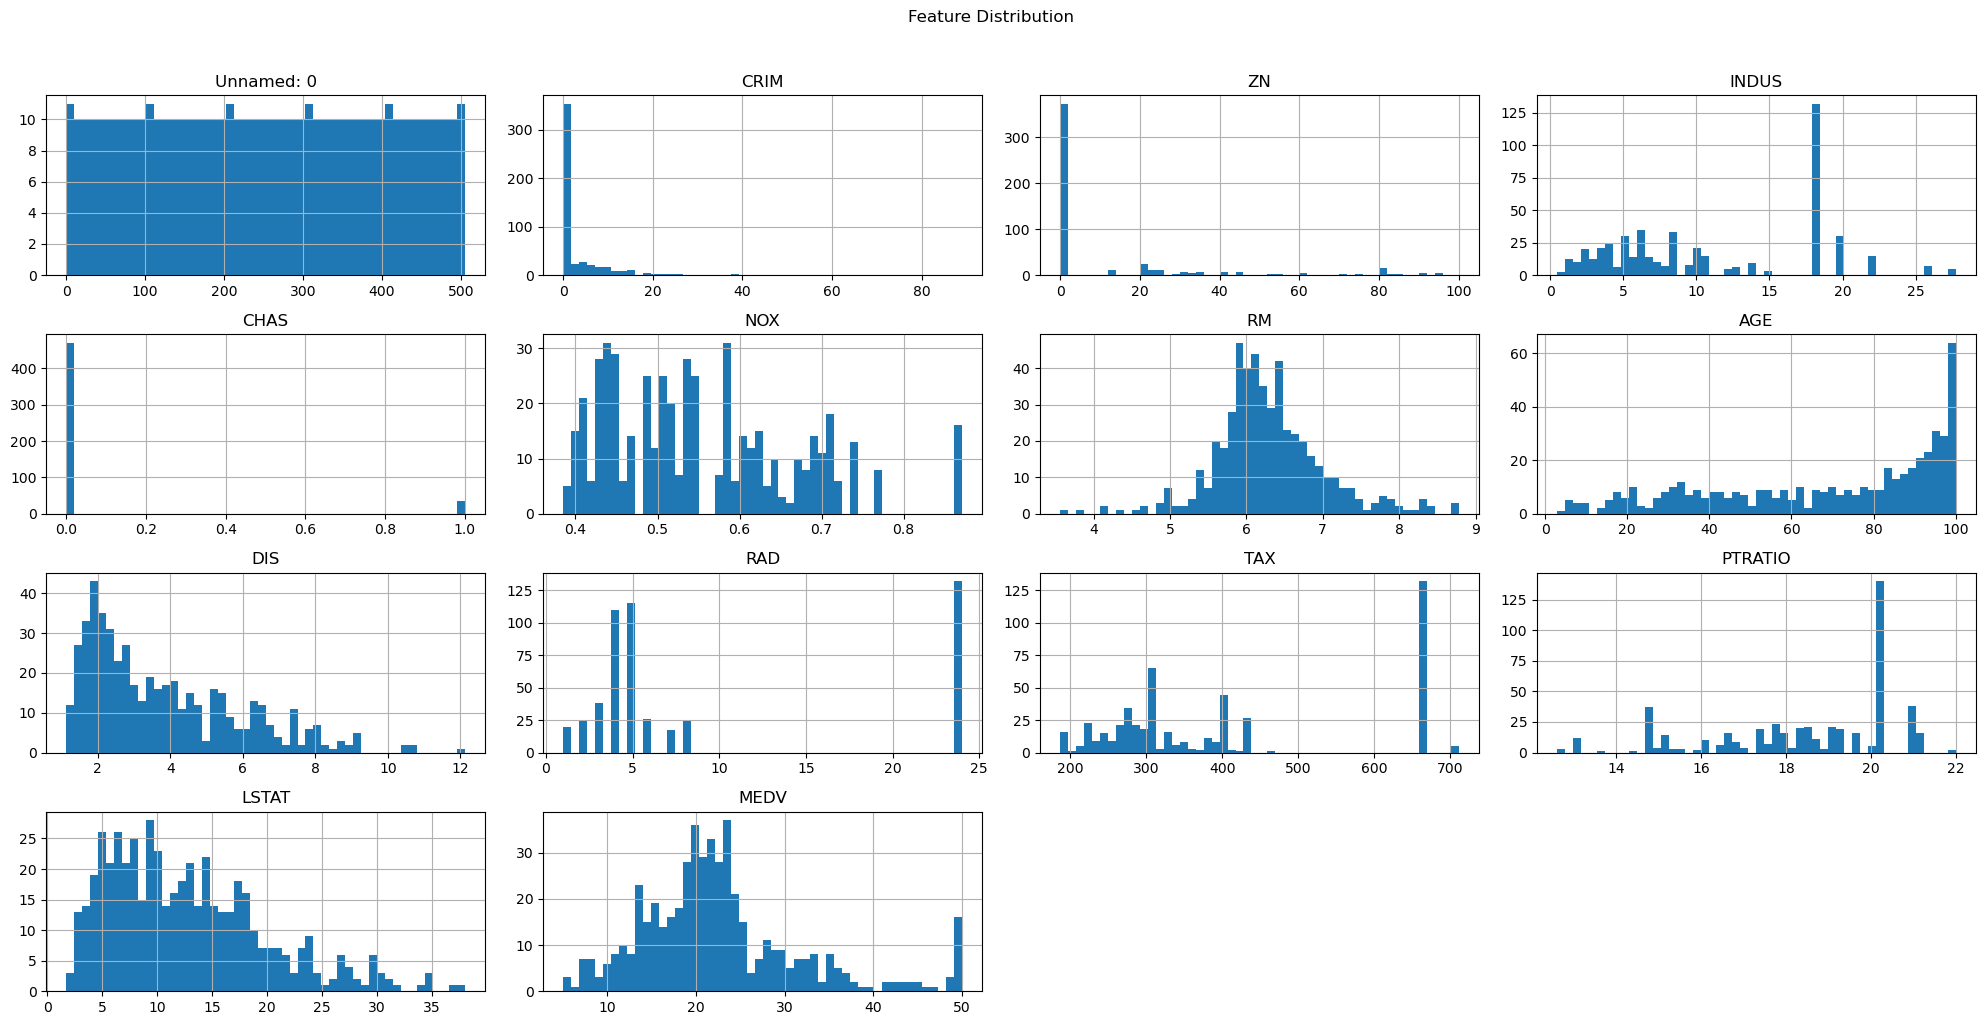

In [4]:
boston_df.hist(bins=50, figsize=(20,10))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

<Figure size 2000x2000 with 0 Axes>

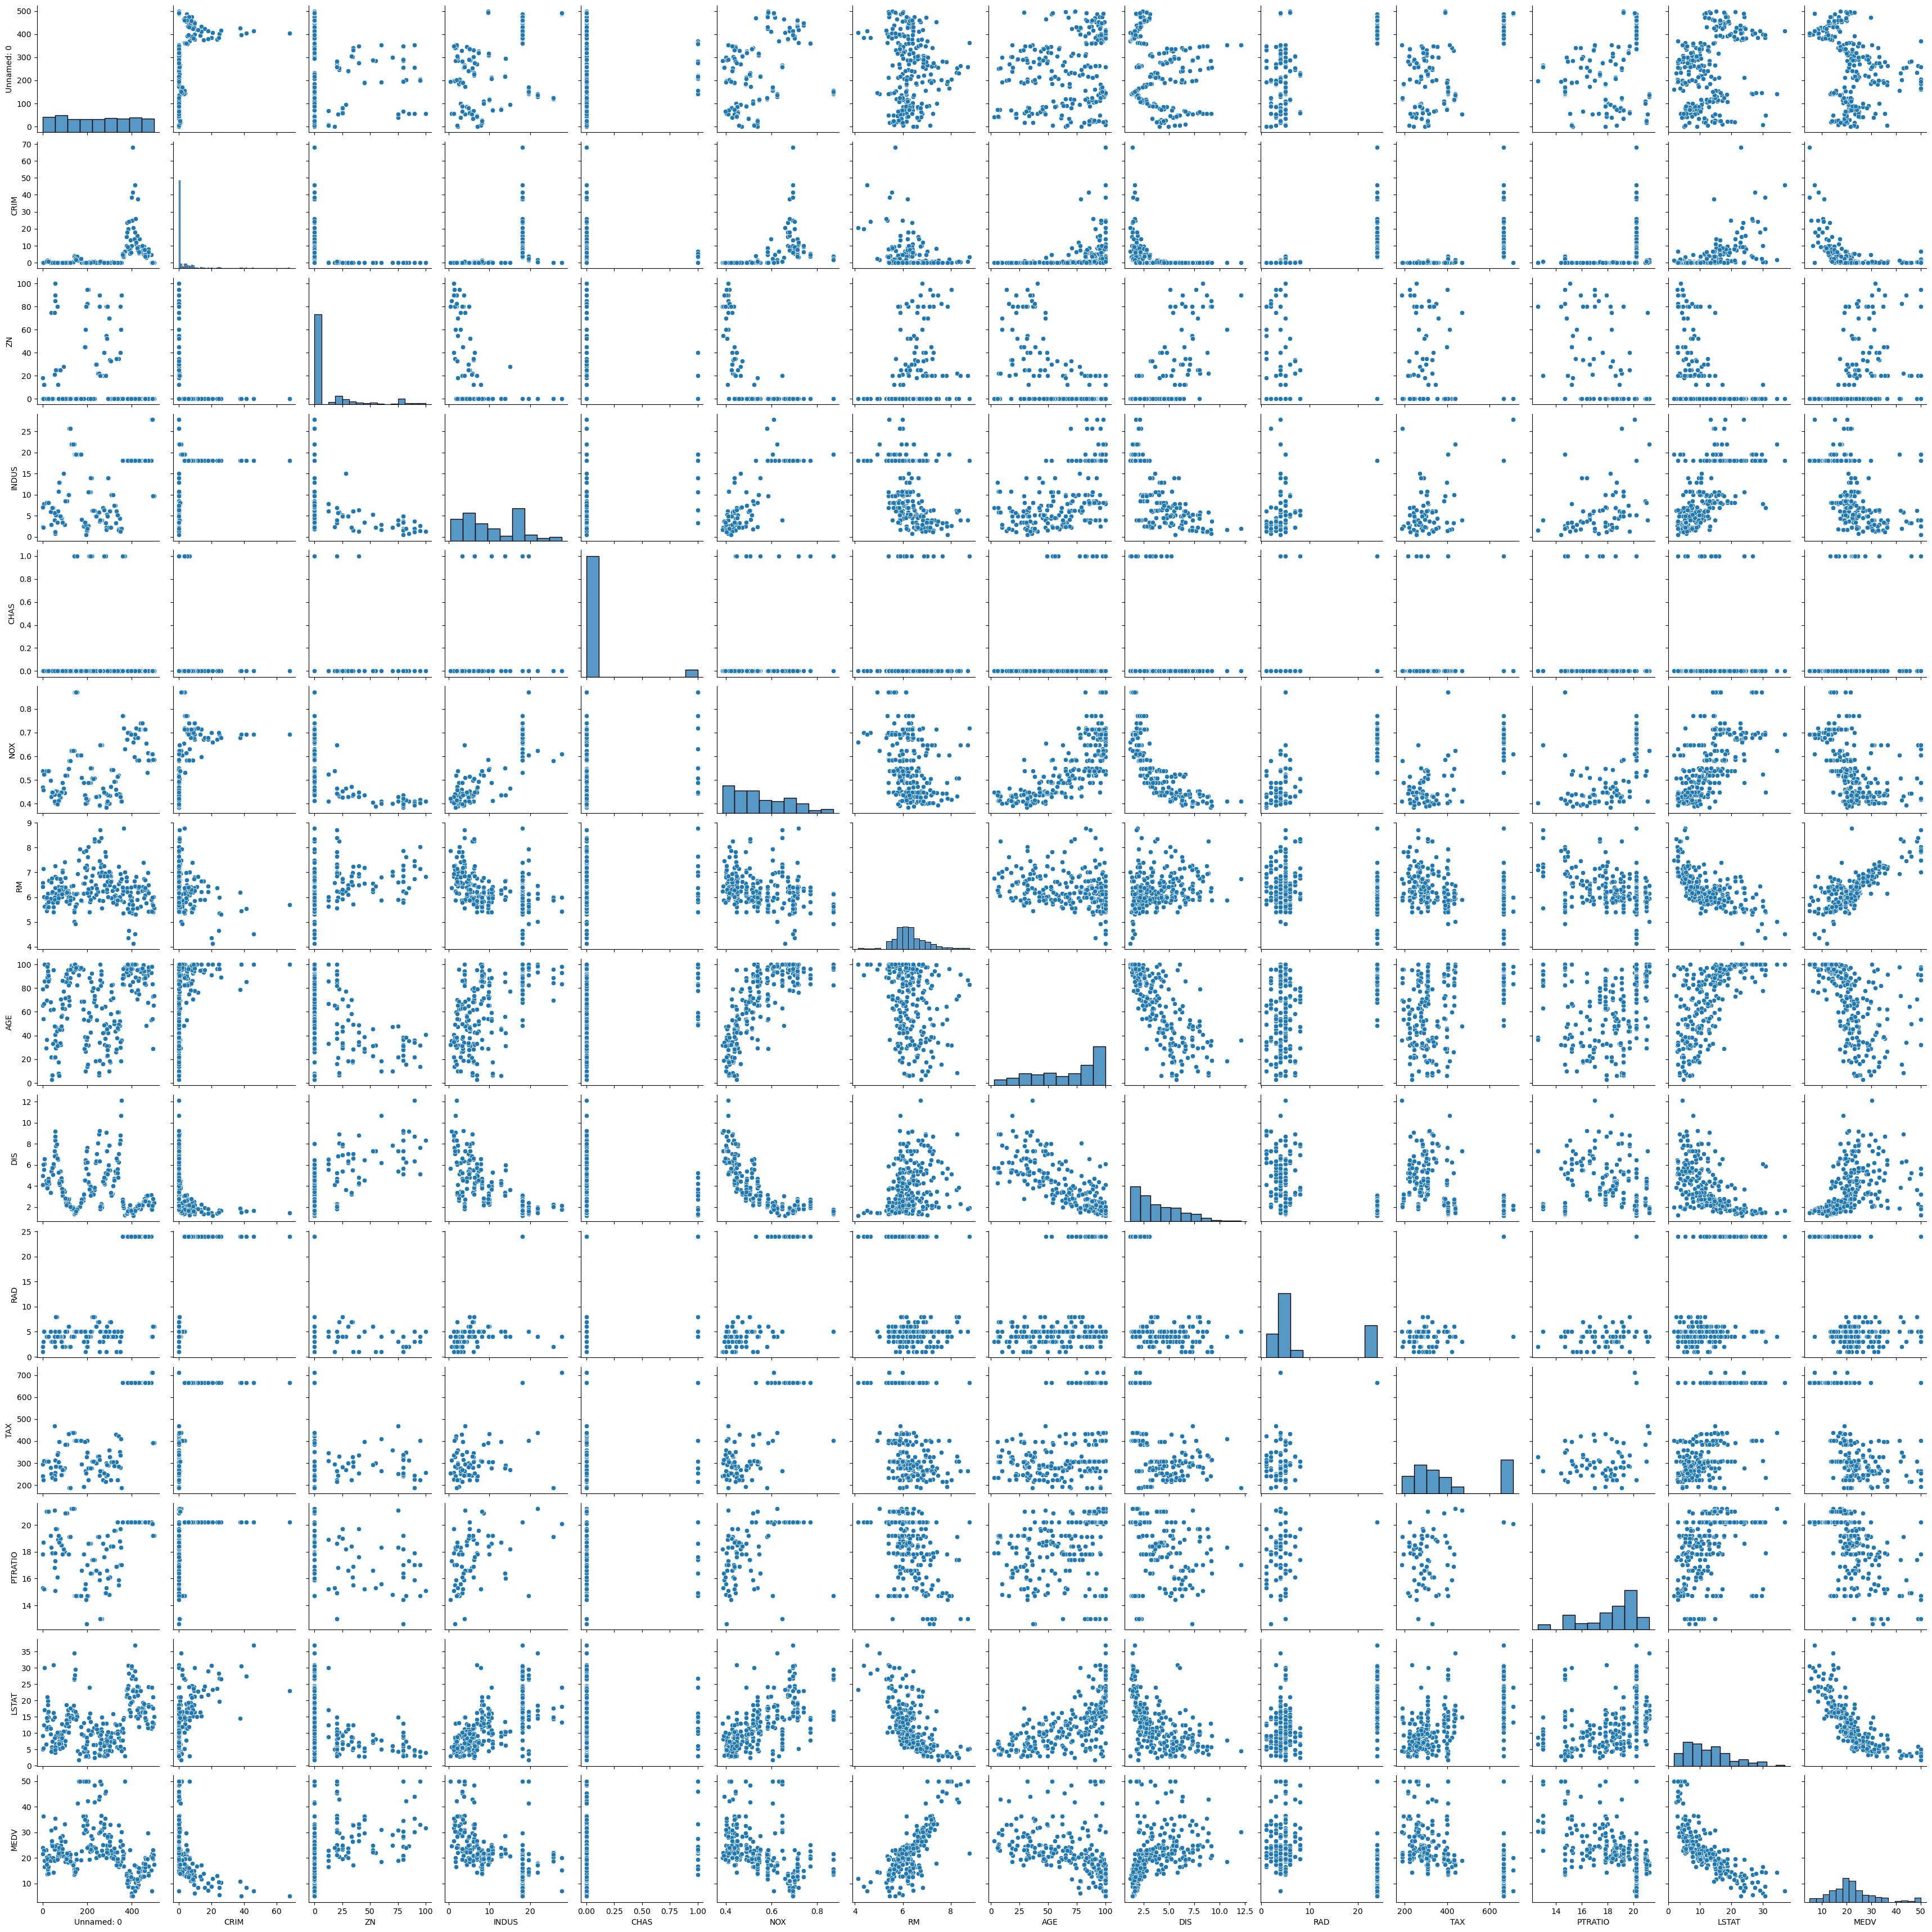

In [5]:
plt.figure(figsize=(20,20))
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize='large')
sns.pairplot(boston_df.sample(250))
plt.show()

Boxplot for Median Value of Owner-Occupied Homes

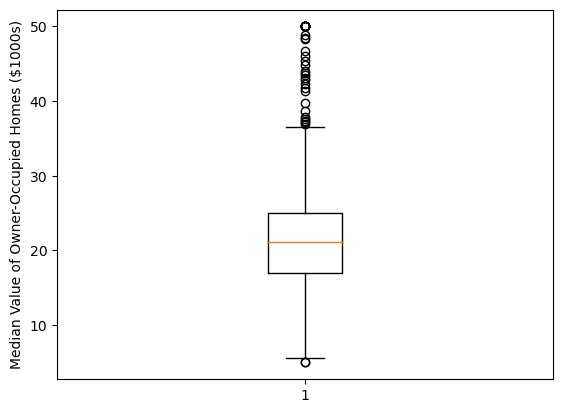

In [6]:
import matplotlib.pyplot as plt

# Create boxplot for median value of owner-occupied homes (in $1000s)
plt.boxplot(boston_df['MEDV'])
plt.ylabel('Median Value of Owner-Occupied Homes ($1000s)')
plt.show()


Bar Plot for Charles River Variable

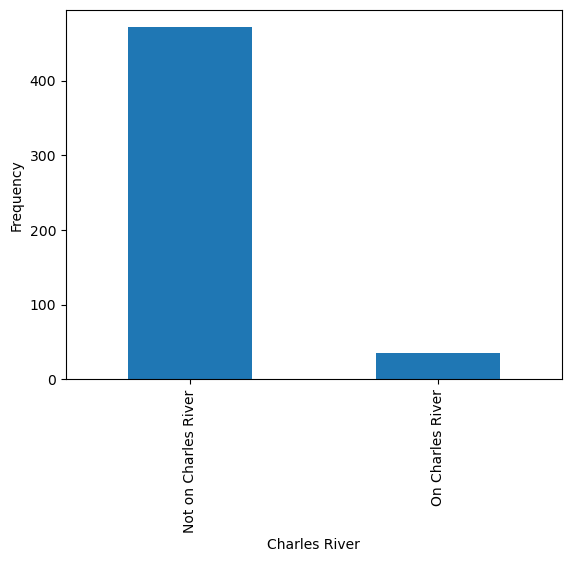

In [7]:
# Create bar plot for Charles River variable
boston_df['CHAS'].value_counts().plot(kind='bar')
plt.xticks([0, 1], ['Not on Charles River', 'On Charles River'])
plt.xlabel('Charles River')
plt.ylabel('Frequency')
plt.show()


Boxplot for MEDV vs AGE

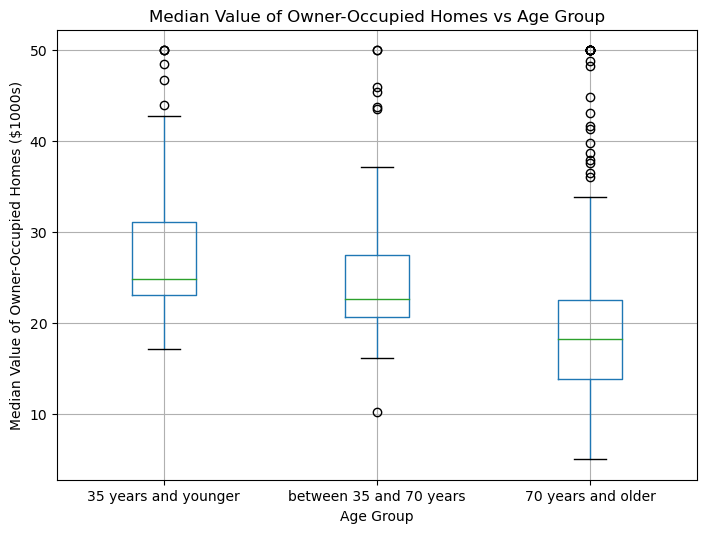

In [8]:
# Discretize AGE variable into three groups
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, boston_df['AGE'].max()], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])

# Create boxplot for MEDV vs AGE_GROUP
boston_df.boxplot(column='MEDV', by='AGE_GROUP', figsize=(8, 6))
plt.suptitle('')
plt.title('Median Value of Owner-Occupied Homes vs Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value of Owner-Occupied Homes ($1000s)')
plt.show()

# Drop AGE_GROUP column
boston_df.drop('AGE_GROUP', axis=1, inplace=True)


Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

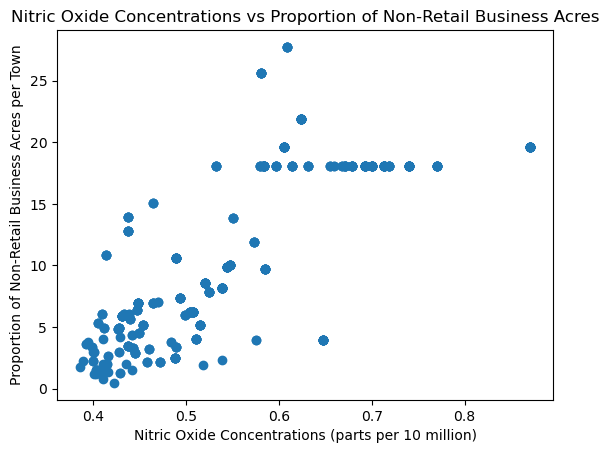

In [9]:
# Create scatter plot for NOX vs INDUS
plt.scatter(boston_df['NOX'], boston_df['INDUS'])
plt.title('Nitric Oxide Concentrations vs Proportion of Non-Retail Business Acres')
plt.xlabel('Nitric Oxide Concentrations (parts per 10 million)')
plt.ylabel('Proportion of Non-Retail Business Acres per Town')
plt.show()


Create a histogram for the pupil to teacher ratio variable

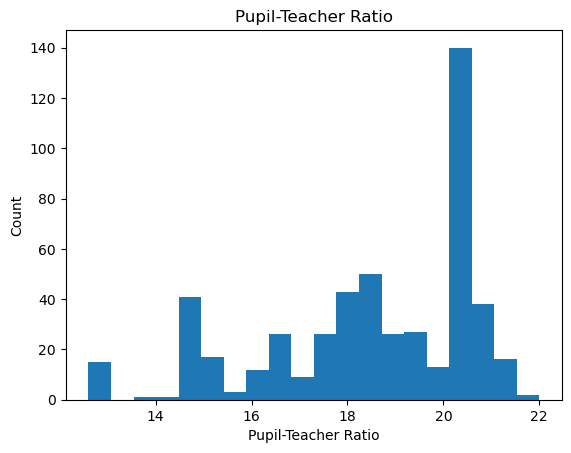

In [10]:
# Create histogram for PTRATIO
plt.hist(boston_df['PTRATIO'], bins=20)
plt.title('Pupil-Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Count')
plt.show()


Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [11]:
# Subset the data into two groups based on the CHAS variable
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']

# Perform t-test
from scipy.stats import ttest_ind
t_stat, p_val = ttest_ind(chas_0, chas_1)

print("T-statistic: ", t_stat)
print("P-value: ", p_val)


T-statistic:  -3.996437466090509
P-value:  7.390623170519905e-05


Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [12]:
# Discretize the AGE variable into three groups of 35 years and younger, between 35 and 70 years, and 70 years and older
age_1 = boston_df[boston_df['AGE'] <= 35]['MEDV']
age_2 = boston_df[(boston_df['AGE'] > 35) & (boston_df['AGE'] <= 70)]['MEDV']
age_3 = boston_df[boston_df['AGE'] > 70]['MEDV']

# Perform ANOVA test
from scipy.stats import f_oneway
f_stat, p_val = f_oneway(age_1, age_2, age_3)

print("F-statistic: ", f_stat)
print("P-value: ", p_val)


F-statistic:  36.40764999196599
P-value:  1.7105011022702984e-15


Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [13]:
# Compute the Pearson correlation coefficient
from scipy.stats import pearsonr
corr_coeff, p_val = pearsonr(boston_df['NOX'], boston_df['INDUS'])

print("Pearson correlation coefficient: ", corr_coeff)
print("P-value: ", p_val)


Pearson correlation coefficient:  0.763651446920915
P-value:  7.913361061239593e-98


What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [14]:
import statsmodels.api as sm

# Define the predictor and response variables
X = boston_df['DIS']
y = boston_df['MEDV']

# Add a constant term to the predictor variable
X = sm.add_constant(X)

# Fit a linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           1.21e-08
Time:                        11:06:22   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

correlation

In [15]:
boston_df.corr()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
Unnamed: 0,1.000000,0.407407,-0.103393,0.399439,-0.003759,0.398736,-0.079971,0.203784,-0.302211,0.686002,0.666626,0.291074,0.258465,-0.226604
CRIM,0.407407,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
ZN,-0.103393,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.399439,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
CHAS,-0.003759,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
NOX,0.398736,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.079971,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.203784,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
DIS,-0.302211,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
RAD,0.686002,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626


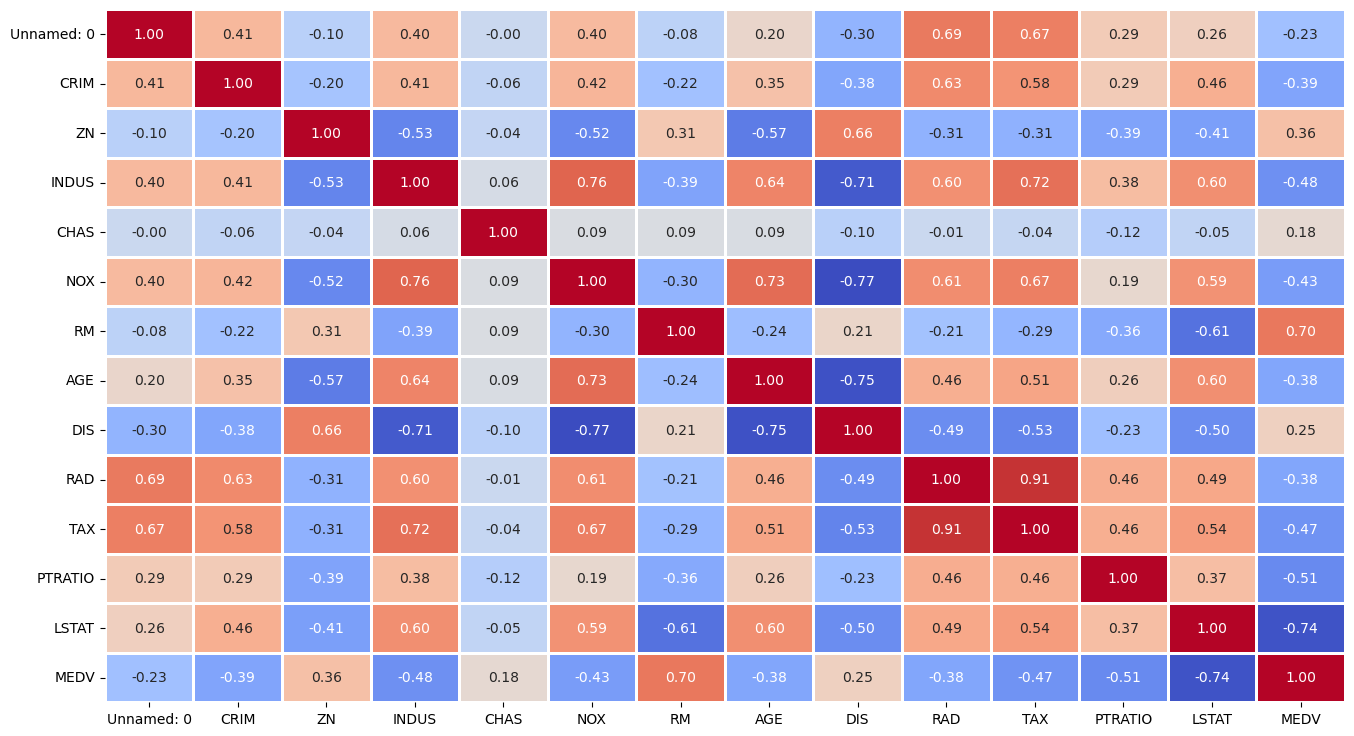

In [16]:
plt.figure(figsize=(16,9))
sns.heatmap(boston_df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2, cbar=False)
plt.show()